#### [**Nicolas Cachanosky**](http://www.ncachanosky.com) | Department of Economics | Metropolitan State University of Denver | ncachano@msudenver.edu

# SOLOW MODEL
---

These notes illustrate how to use code the Solow Model in Python. The purpose of the note is to walk through Python applications, not to offer a detailed discussion of the Solow Model. The note also assumes familiarity with economic concepts and a beginner experience with Python.

For a more complete and detailed discussion of Pythong applications see the material in [Quant Econ](https://quantecon.org/).


## CONTENT
1. The production function
2. Evolution of inputs

## 1. THE PRODUCTION FUNCTION

A neoclassical production function, $f(x_{i})$ where each $x_{i} \geq 0$, satisfies the Inada conditions: 

1. The production function has diminishing marginal returns: $\partial f(x)/\partial x > 0$ and $\partial^2/\partial x^2 <0$
2. If there is no input, there is no production: $f\left(x=0\right)=0$
3. As the value of the input approaches to zero, the first derivative approaches to infinity: $\lim\limits_{x \to 0^+} \partial f(x)/\partial x = +\infty $
4. As the value of the input approaches to infinity, the first derivative approaches to zero: $\lim\limits_{x \to +\infty} \partial f(x)/\partial x = 0^+$

Assume a Cobb-Douglas production function in discrete time $(t)$ with Hicks-neutral techonology $(A)$, and with constant returns to scale where $\alpha \in (0, 1)$ is the output elasticity of capital. 

\begin{equation}
    Y_{t}\left(K_{t}, N_{t}\right) = A_{t} \cdot F\left(K_{t}, N_{t}\right) =  A_{t} \cdot \left(K_{t} ^{\alpha} N_{t}^{1-\alpha}\right)
\end{equation}

The first and second derivatives are:

\begin{equation}
    \frac{\partial   Y_{t}}{\partial K}   = \alpha \cdot A\left(\frac{N_{t}}{K_{t}}\right)^{1-\alpha} 
  = \alpha \cdot \frac{Y_{t}}{K_{t}} > 0 \; \text{and} \;
    \frac{\partial^2 Y_{t}}{\partial K^2} = -\alpha (1-\alpha) \cdot A\left(\frac{N_{t}}{K_{t}}\right)^{1-\alpha} < 0
    \\
    \frac{\partial   Y_{t}}{\partial N}   = (1-\alpha) \cdot A\left(\frac{K_{t}}{N_{t}}\right)^{\alpha} 
  = (1-\alpha) \cdot \frac{Y_{t}}{N_{t}} > 0 \; \text{and} \;
    \frac{\partial^2 Y_{t}}{\partial N^2} = -\alpha (1-\alpha) \cdot A\left(\frac{K_{t}}{N_{t}}\right)^{1-\alpha} < 0
\end{equation}

Python can also calculate the derivatives for you. For this, Python needs two packages, 'numpy' and "sympy'. In addition, the result of the derivatino can be printed in LaTeX format. The example below calculates the first partial derivative of the output function with respect to capital and prints the output in Pythong and LaTeX formats.

In [2]:
"1|IMPORT PACKAGES"
import numpy as np
from sympy import Symbol
from sympy import latex

"2|TELL PYTHON TO TREAT VARIABLES AS 'MATH' SYMBOLS"
A, K, N, alpha = Symbol('A'), Symbol('K'), Symbol('N'), Symbol('alpha')  
Y = A * (K)**(alpha) * (N)**(1-alpha)                                    

"3|CALCULATE THE DERIVATIVE AND PRINT THE RESULT"
Yprime = Y.diff(K)   # Calculate the partial derivative with respect to K
print(Yprime)        # Print dY/dK
latex(Yprime)        # Print dY/dK in LaTeX format

A*K**alpha*N**(-alpha + 1)*alpha/K


'\\frac{A K^{\\alpha} N^{- \\alpha + 1} \\alpha}{K}'

## 2. PRODUCTION PER CAPITA

Assume $N$ grows at rate $n$: $N_{t+1} = (1+n) \cdot N_{t}$. Write the production function in *per capita* terms:

\begin{align}
    Y_{t} &= A_{t} \cdot \left(K_{t}^{\alpha}N_{t}^{1-\alpha} \right) \\
    \frac{Y_{t}}{N_{t}} &= A_{t} \cdot \left[ \left(\frac{K_{t}}{N_{t}} \right)^{\alpha} \left(\frac{N_{t}}{N_{t}} \right)^{1-\alpha} \right] \\
    k_{t} &= A_{t} \cdot k_{t}^{\alpha} = f(k)
\end{align}

The following code plots the level of output for changes in $K$ at different levels of $A$. The first part of the code imports the required packages. The second part of the code sets the parameter values and defines a user-defined (production) function. The third part of the code builds the graph. To be able to plot, Python needs the 'matplotlib' package.

Remember that Python numbers the first element of a vector 'V' with a zero. If the first element is 'a', then $V[0] = a$. The code sets the plot line to be a solid blue line ("b-") with some transparency set by the value of 'alpha'.

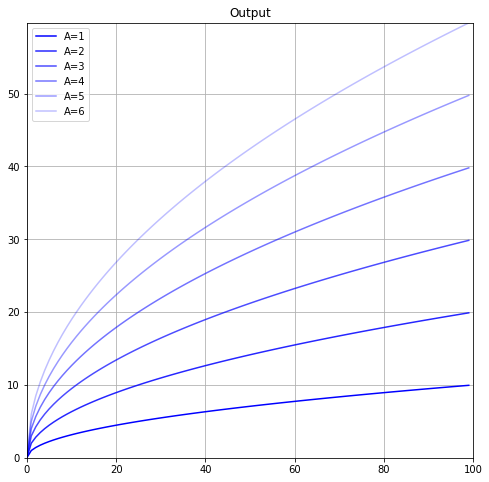

In [4]:
"1|IMPORT PACKAGES"
import numpy as np               # Package for scientific computing with Python
import matplotlib.pyplot as plt  # Matplotlib is a 2D plotting library

"2|DEFINE PARAMETERS AND ARRAYS"
K_size = 100                # Model domain
A = 1                       # Total Factor Productivity
N = K_size/2                # Capital stock
alpha = 0.50                # Output elasticity of capital
k = np.arange(K_size)       # Create empty array of K
y = np.empty(K_size)        # Create empty array of Y

y2 = np.empty(K_size)       # Create arrays to be filled with output values
y3 = np.empty(K_size)
y4 = np.empty(K_size)
y5 = np.empty(K_size)
y6 = np.empty(K_size)

def output(k, A):           # User-defined Cobb-Douglas Production Function
    y = A * (k)**(alpha)    
    return y

for i in range(0, K_size):  # Calculate Y for each value of K in its domain
    y[i]  = output(i, A)  
    y2[i] = output(i, A+1)
    y3[i] = output(i, A+2)
    y4[i] = output(i, A+3)
    y5[i] = output(i, A+4)
    y6[i] = output(i, A+5)
    
ymax = np.max(y6)

"3|PLOT THE PRODUCTION FUNCTION FOR DIFFERENT VALUES OF TECHNOLOGY"
v = [0, K_size, 0, ymax]                       # Set the axes range
fig, ax = plt.subplots(figsize=(8, 8))
ax.set_title("Output")
ax.grid()
ax.plot(k, y,  "b-", alpha=1.00, label="A=1")
ax.plot(k, y2, "b-", alpha=0.85, label="A=2")
ax.plot(k, y3, "b-", alpha=0.70, label="A=3")
ax.plot(k, y4, "b-", alpha=0.55, label="A=4")
ax.plot(k, y5, "b-", alpha=0.40, label="A=5")
ax.plot(k, y6, "b-", alpha=0.25, label="A=6")
ax.legend() 
plt.axis(v)                                    # Use 'v' as the axes range
plt.show()

---
## 2. STEADY STATE

To find the steady-state (equilibrum) of the Solow Model a motion function that tracks changes in capital is needed. Investment increases capital stock. Depreciation reduces the capital. When investment and depreciation are equal, capital stock does not change.

### 2.1 Increase in the Capital Stock: Investment

Invesmtnt $(I)$ is a fixed and exogenous savings rate $\left(s \in (0, 1) \right)$ of income. In per capita terms $\left(i=I/N\right)$:

\begin{equation}
   i_{t} = s \cdot \left(A \cdot k_{t}^{\alpha}\right) = s \cdot y_{t}
\end{equation}

Since income per capita increases at a decreasing rate with capital, so does investment per capita, which is a fixed proportion $\left(s\right)$ of income.

Assuming a closed economy with no government, consuption per capita is the difference between income and investment: $c = y - i$

### 2.2 Decrease in the Capital Stock: Depreciation and Dilution

There are two reasons why capital per capita decreases. The first one is capital depreciation. The second one is capital dilution, which is when population grows faster than capital. All other variables constant, to keep capital per capita constant, capital stock needs to grow at the same rate than population.

The amount of depreciation $D$ is a fixed rate $\left(d \in (0, 1) \right)$ of the capital stock. In per capita ters:

\begin{equation}
   d_{t} = \delta \cdot k_{t}
\end{equation}

The derivative of $k$ with respect to time yields the change in capital per capita taking into account depreciation and capital dilution (dropping the subscript $t$ for notation simplicity):

\begin{align}
 \frac{\partial k}{\partial t} &= \frac{\partial (K/L)}{\partial t}                                                       \\
 \frac{\partial k}{\partial t} &= \frac{1}{L} \frac{\partial K}{\partial t} - \frac{K}{L^2} \frac{\partial L}{\partial t} \\
 \frac{\partial k}{\partial t} &= \frac{sY - \delta K}{L} - \frac{K}{L} \cdot \frac{\partial L}{\partial t} \frac{1}{L}   \\
 \frac{\partial k}{\partial t} &= sy - \delta k - k n                                                                     \\
 \frac{\partial k}{\partial t} &= sy - \left(\delta + n \right)k                                                          \\
 \frac{\partial k}{\partial t} &= s \cdot Ak^{\alpha} - \left(\delta + n \right)k
\end{align}

---

The steady-state is the value $k^*$ that given the productoin function and population growth rate, maintains the capital stock per capita constant $\left(\partial k/\partial t =0 \right)$. 

\begin{align}
  (\delta + n)k &= s \cdot Ak^{\alpha}         \\
  k^{1-\alpha} &= A \cdot \frac{s}{\delta + n} \\
  k^* &= \left[ A \cdot \frac{s}{\delta + n} \right]^{\frac{1}{1-\alpha}}
\end{align}

The value of $k^*$ allows to calculate the steady-state values of the other model variables.
\begin{align}
  y^* &= A(k^8)^{\alpha}  \\
  i^* &= sy^*             \\
  c^* &= y^* - i^*        \\
  d^* &= \delta k^*
\end{align}

The code below calculates the steady-state values and graphs the Solow Model in per capita values. Steady-state values are shown in table. For this the package "tabulate" is necessary [if you are using Anaconda, you need to install this package in the 'Environments' section].


Variable        Steady-State
------------  --------------
Capital                49
Output                  7
Consumption             4.55
Depreciation            1.47
Investment              2.45


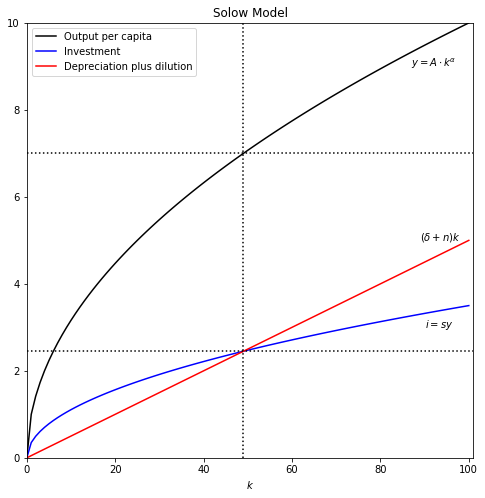

In [3]:
"1|IMPORT PACKAGES"
import numpy as np               # Package for scientific computing with Python
import matplotlib.pyplot as plt  # Matplotlib is a 2D plotting library
from tabulate import tabulate    # Pretty-print tabular data in Python

"2|DEFINE PARAMETERS AND ARRAYS"
K_size = 101                     # Model domain
A = 1                            # Total Factor Productivity
alpha = 0.50                     # Output elasticity of capital
delta = 0.03                     # Depreciation rate
s = 0.35                         # Savings rate
n = 0.02                         # Population growth rate
k = np.arange(K_size)            # Create array of k
y = np.empty(K_size)             # Create array of y
d = np.empty(K_size)             # Create array of d
i = np.empty(K_size)             # Create array of i
c = np.empty(K_size)             # Create array of c
d_and_i = np.empty(K_size)       # Create array for depreciation plus dilution

"3|DEFINE FUNCTIONS"
def output(k):   # Cobb-Douglas Production Function (per capita)
    y = A * (k)**(alpha)    
    return y

"4|POPULATE ARRAYS"
for j in range(0, K_size):
    y[j] = output(j)               # Production function
    d[j] = delta*k[j]              # Depreciation
    i[j] = s*y[j]                  # Investment
    d_and_i[j] = (delta + n)*k[j]  # Depreciation plus dilution
    

y_max = np.max(y)

"5|CALCULATE STEADY-STATE VALUES"
k_star = (s/(n+delta)*A)**(1/(1-alpha))
y_star = A *(k_star**alpha)
i_star = s*y_star
c_star = y_star - i_star
d_star = delta*k_star

headers = ["Variable", "Steady-State"] # Table headings

table = [["Capital"     , k_star],     # Table rows
         ["Output"      , y_star],  
         ["Consumption" , c_star],  
         ["Depreciation", d_star],  
         ["Investment"  , i_star]]

print(tabulate(table, headers))

"6|PLOT THE SOLOW MODEL"               
v = [0, K_size, 0, y_max]              # Axis range
fig, ax = plt.subplots(figsize=(8, 8))
ax.plot(k, y      , "k", ls = '-', label="Output per capita")
ax.plot(k, i      , "b", ls = '-', label="Investment")
ax.plot(k, d_and_i, "r", ls = '-', label="Depreciation plus dilution")
ax.set(title="Solow Model", xlabel=r'$k$')
plt.text(87, 9, r'$y = A \cdot k^{\alpha}$')
plt.text(89, 5, r'$(\delta + n)k$')
plt.text(90, 3, r'$i = sy$')
plt.legend(loc=2)
plt.axvline(x = k_star, ymin = 0, ymax = y_star, ls = ":", color = 'k')
plt.axhline(y = i_star, xmin = 0, xmax = k_star, ls = ":", color = 'k')
plt.axhline(y = y_star, xmin = 0, xmax = y_star, ls = ":", color = 'k')
plt.axis(v)
plt.show()

## 3. SHOCKS

## 4. GOLDEN RULE